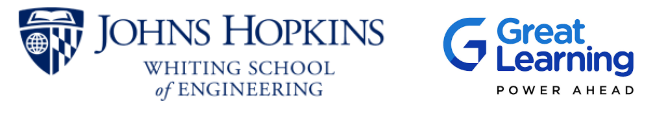



<font size=10>**Natural Language Processing**</font>

<font size=6>**NFL Draft Sentiment Analysis**</font>

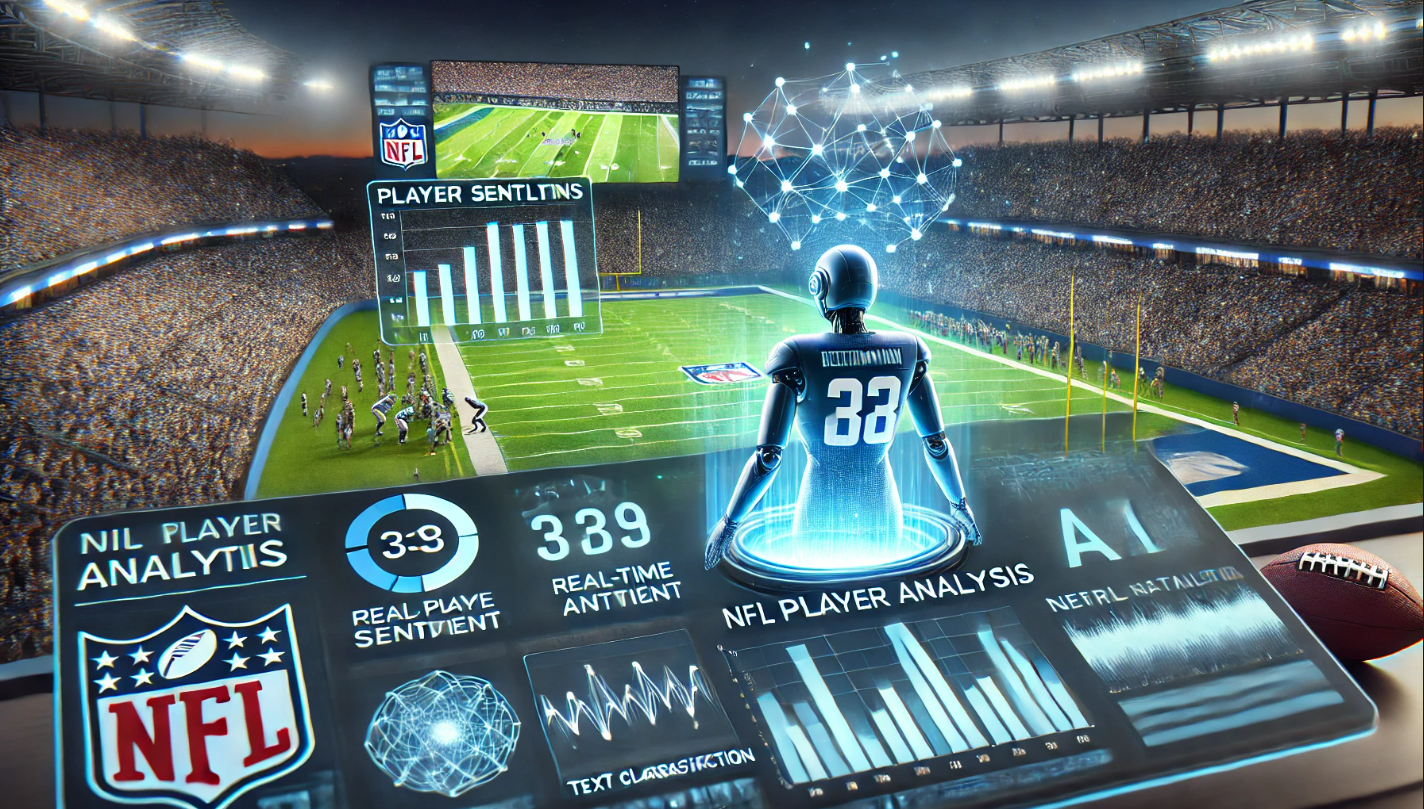

# **Scenario Setup**

Imagine you are an NFL team manager preparing for the upcoming **NFL draft***. Your goal is to analyze player sentiment from fan discussions, expert reviews, and social media to make informed decisions.

**The NFL Draft is an annual event where teams select eligible college football players to join the league, aiming to strengthen their teams.*

## **Overview**

The National Football League (NFL) Draft is one of the most anticipated events in professional football, where teams strategically select players to strengthen their rosters. However, beyond traditional scouting reports and performance metrics, public sentiment plays a crucial role in assessing a player's marketability, fan support, and potential impact.

To gain deeper insights, this study leverages Natural Language Processing (NLP) on Reddit discussions—a platform where fans, analysts, and experts actively debate NFL draft picks. Given the vast volume of unstructured text, manually processing these insights would be time consuming.

To address this challenge, the organization sought an AI-driven solution leveraging Natural Language Processing (NLP). By implementing traditional NLP techniques, the goal was to automate text classification and sentiment analysis to enhance decision-making and engagement.

In this study, a dataset containing thousands of text records from NFL-related sources was identified. The goal is to develop an AI-driven system that classifies sentiments, extracts key insights, and enhances decision-making processes for teams and analysts.

By implementing NLP techniques, the NFL aimed to achieve high accuracy in text classification, player sentiment analysis, and keyword extraction. The successful adoption of AI-powered text analysis could further enable predictive analytics, fan engagement insights, and data-driven decision-making for teams and management.

This AI-powered transformation not only streamlined data processing but also positioned the NFL as a tech-driven organization leveraging AI to optimize sports analytics and enhance fan engagement.

## **Key Outcomes**

- Understanding **<font color='blue'>NLP Workflows</font>** and learn how AI models can process and classify large volumes of unstructured text efficiently.

- Learn how businesses and sports analysts **<font color='blue'>utilize AI-driven sentiment analysis</font>** to evaluate players, teams, and public perception.

- Explore **<font color='blue'>predictive capabilities for team management and fan engagement</font>** using NLP.

## **Methodology Overview**

📌 **1. Function Definitions**

Define functions to apply sentiment analysis models and count positive, neutral, and negative comments separately

📌 **2. Sentiment Analysis**

Using a pre-trained sentiment analysis model to classify sentiments.



# **<font color='blue'>Setup and Dataset Loading</font>**

We'll be using the following libraries.

1. `numpy` and `pandas`: For handling numerical computations and data manipulation.
3. `nltk`: (*Natural Language Toolkit*) Used for text preprocessing.
4. `os` and `re`: Used for file operations and regex-based text extraction.

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import os
import re

In [ ]:
"""
About this file: This file represents the analysis done on the reddit data aggregated by scrapping from site
"""

# Load dataset containing scrapped data from reddit for the year 2021
csv_file_path = "/content/NFL_reddit_data_2021.csv"
df = pd.read_csv(csv_file_path)

# Display first few rows
df.head()


*Stopwords:* Common words like "the", "is", "in" that don’t contribute much meaning.

*Punkt/punkt_tab:* Pre-trained tokenizer for sentence splitting.

*WordNet:* A lexical database for lemmatization.


In [ ]:
!pip install nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import unicodedata

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

**Theory:**

- **Tokenization:** Breaking text into words (or subwords) for processing.
- **Stopword Removal:** Eliminating words that don’t contribute meaning.
- **Lemmatization:** Converting words to their base form (e.g., "running" → "run").

**Text Preprocessing:** Often requires regular expressions to clean raw text data before applying NLP techniques.

## **<font color='blue'>Data Pre-processing</font>**

**Stopword Removal:** Helps in improving model efficiency by reducing noise.

**Lemmatization vs. Stemming**:
  - **Lemmatization** (used here) ensures the word remains meaningful.
  - **Stemming** often produces root words that may not be real words.

In [ ]:
# Initialising Stopwords and Lemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

### **Function Definitions**

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from a list of tokenized words"""
    return [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in words]

def to_lowercase(words):
    """Convert all words to lowercase"""
    return [word.lower() for word in words]

def remove_punctuation(words):
    """Remove punctuation"""
    return [re.sub(r'[^\w\s]', '', word) for word in words if re.sub(r'[^\w\s]', '', word) != '']

def remove_stopwords(words):
    """Remove stopwords"""
    return [word for word in words if word not in stop_words]

def lemmatize_list(words):
    """Lemmatize words"""
    return [lemmatizer.lemmatize(word, pos='v') for word in words]

def normalize(text):
    """Full preprocessing pipeline"""
    words = nltk.word_tokenize(text)  # Tokenize text
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

In [ ]:
df["clean_text"] = df["text"].astype(str).apply(normalize)
df.head()

# **<font color='blue'>Sentiment Analysis</font>**


### ***Computes:***
    
  - **Total sentiment score** (overall_sentiment_score).
  - **Percentage of positive comments** (percent_positive).

Stores results in a **DataFrame**.

- Imports **VADER (Valence Aware Dictionary and sEntiment Reasoner)** from `nltk.sentiment`.
- Downloads the `vader_lexicon`, which contains pre-defined word sentiment scores.
- Initializes the **SentimentIntensityAnalyzer**.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

#### **Theory:**
**VADER** is a rule-based sentiment analysis tool designed for short, informal text (e.g., social media).

It assigns four sentiment scores:
- `pos` (positive sentiment score)
- `neg` (negative sentiment score)
- `neu` (neutral sentiment score)
- `compound` (overall sentiment score, ranging from -1 to 1)

In [ ]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def get_sentiment(text):
    scores = sia.polarity_scores(text)        # Get sentiment scores
    if scores['compound'] >= 0.05 and scores['pos'] > scores['neg']:
        return "Positive"
    elif scores['compound'] <= -0.05 and scores['neg'] > scores['pos']:
        return "Negative"
    else:
        return "Neutral"

The above function extracts sentiment scores from a given text.

Assigns a categorical label (`Positive`, `Negative`, `Neutral`) based on:
- `compound` score:
  - ≥ **0.05** → Positive
  - ≤ **-0.05** → Negative
  - Else → Neutral
- Ensures `pos` score is greater than `neg` for positive classification.

The **compound score** is a normalized weighted sum of sentiment scores.

It **accounts for context** better than simple word counting.

In [ ]:
# Apply sentiment analysis
df["sentiment"] = df["clean_text"].apply(get_sentiment)


Vectorized text processing allows for **efficient batch sentiment classification**.

Displays the first 10 rows with:
- `player`: Name of the player being discussed.
- `clean_text`: Preprocessed Reddit comment.
- `sentiment`: Assigned sentiment.

In [ ]:
# Display results
df[["player", "clean_text", "sentiment"]].head(10)

In [ ]:
# Save the processed dataset (including sentiment labels) as a CSV file.

output_csv_path = "/content/NFL_reddit_sentiment_analysis.csv"
df.to_csv(output_csv_path, index=False)

print(f"Sentiment Analysis CSV saved at: {output_csv_path}")


Groups sentiment results per player and counts occurrences.
- Aggregating sentiments helps measure player popularity based on Reddit discussions.

Assigns a numerical sentiment score for each player:
- +1 for positive
- -1 for negative
- 0 for neutral

Normalizes by dividing by total comments.

In [ ]:
# Group by player
player_sentiment = df.groupby("player")["sentiment"].value_counts().unstack(fill_value=0)

# Calculate percentage of positive comments per player
player_sentiment["percent_positive"] = player_sentiment["Positive"] / player_sentiment.sum(axis=1)

# Calculate overall sentiment score using weighted sum
player_sentiment["overall_sentiment_score"] = (
    (player_sentiment["Positive"] * 1) + (player_sentiment["Neutral"] * 0) + (player_sentiment["Negative"] * -1)
) / player_sentiment.sum(axis=1)

# Display results
player_sentiment.head(20)


1. A higher score means the player is viewed positively by fans.
2. This **aggregated sentiment** is more robust than raw counts.
3. Save the final **player-wise sentiment summary**.

In [ ]:
player_sentiment.to_csv("/content/player_sentiment_results.csv")


# **<font color='blue'>Visualising the Scores</font>**


### **Analysis of Top 25 Players**

1. If we want to see the **most favorably received players overall**, we should use the **overall sentiment score**, which accounts for both positive and negative sentiment weights.
2. Select the **top 25 players** using `.head(25)`.
3. Print the sorted DataFrame to see the **best 25 players based on sentiment**.


In [ ]:
# Sort players by highest overall sentiment score first
top_25_players = player_sentiment.sort_values("overall_sentiment_score", ascending=False).head(25)

# Display top 25 players based on overall sentiment score
print("Top 25 Players Based on Overall Sentiment Score")
display(top_25_players)


- **Matplotlib** (`plt`): A basic visualization library for creating static, animated, and interactive plots.
- **Seaborn** (`sns`): A high-level API built on top of Matplotlib for visually appealing statistical plots.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=top_25_players.index, y=top_25_players["overall_sentiment_score"], palette="viridis")
plt.xticks(rotation=75)
plt.title("Top 25 Players with Highest Overall Sentiment", fontsize=14)
plt.xlabel("Player", fontsize=12)
plt.ylabel("Overall Sentiment Percentage", fontsize=12)
plt.show()


In [ ]:
top_25_players.to_csv("/content/top_25_players.csv")

### **Sentiment Distribution Across All Players**

- To understand the overall sentiment composition (Positive, Neutral, Negative) across all comments.

In [ ]:
# Count plot of sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df["sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution in 2021 Reddit NFL Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


**WordCloud**
- Generates a visual representation of frequently occurring words in text data.
- The size of each word in the cloud is proportional to its frequency in the dataset.

Let's generate the word cloud for the positive comments
1. Filters the dataset to select **only "Positive"** sentiment comments.
2. Converts these comments into a **single large string** where words are separated by spaces.
3. This prepares the data for **word frequency analysis**.


In [ ]:
from wordcloud import WordCloud

# Set seaborn style
sns.set(style="whitegrid")


In [ ]:
positive_text = " ".join(df[df["sentiment"] == "Positive"]["text"].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Positive Comments", fontsize=14)
plt.show()

- **Bigger words** appear more frequently in positive comments.
- Words like "**pick,**" "**draft,**" "**love,**" "**good,**" "**great**" indicate **fans' excitement and positive reactions**.
- Team names like "**Patriots,**" "**49ers,**" "**Cowboys**" suggest discussions about specific teams.

# **Conclusion**

-  The sentiment analysis model successfully identifies <font color='blue'>**key insights** </font> from Reddit discussions regarding NFL draft picks.
- The model’s effectiveness in <font color='blue'>**assessing fan sentiment** </font> ensures a data-driven approach to predicting <font color='blue'>**player popularity** </font> and <font color='blue'>**potential future performance** </font>.  
- Highlights the model's <font color='blue'>**ability to capture nuanced opinions** </font>, with:  
  - Precise classification of <font color='blue'>**positive, neutral, and negative sentiment** </font>.  
  - Reduction in noise from irrelevant or misleading comments..  
- Demonstrates scalability for <font color='blue'>**larger datasets** </font>, supporting analysis across <font color='blue'>**multiple seasons and thousands of player mentions** </font> efficiently.  
- Resolves key inefficiencies in <font color='blue'>**manual sentiment tracking** </font> while showcasing:  
  - <font color='blue'>**Innovation** </font> in leveraging NLP for sports analytics..  
  - Focus on <font color='blue'>**data-driven decision-making** </font> through AI  methodologies.  



## **Further Enhancement**

* Experiment with different sentiment models for robustness (BERTweet, RoBERTa, GPT-based classifiers).

* Use TextBlob + Named Entity Recognition (NER) to extract player/team mentions
* Expand beyond English to include Spanish, French, etc.
